In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import cvxpy as cp

In [25]:
V = loadmat('MJ.mat')['MJ']
m,n = V.shape

X = cp.Variable((m,n))

# Finding where V is not equal to 1
idx = np.where(V != 1)

constraints = [
    X[idx] == V[idx]
]
A1 = X[2:m, 1:n-1]
A2 = X[1:m-1, 1:n-1]
A3 = X[1:m-1, 2:n]
A4 = X[1:m-1,1:n-1]

g1 = cp.sum(cp.abs(A1-A2))
g2 = cp.sum(cp.abs(A2-A3))
objective = g1 + g2

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()

np.float64(25977.84119495187)

In [32]:
print(f"The optimal value is: {prob.value}")

The optimal value is: 128.0


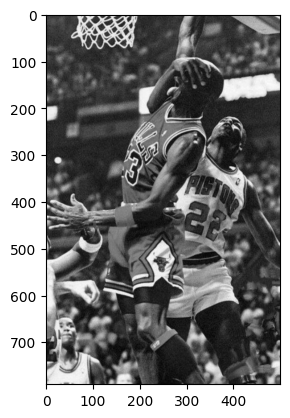

In [27]:
plt.imshow(X.value, cmap='gray')

# Problem 2: Deciphering a secret

In [ ]:
data = loadmat('encrypted_secret.mat')
A = np.array(data['A'], dtype=float)
y = np.array(data['y'], dtype=float).reshape(170)

m,n = A.shape

x = cp.Variable(n, boolean=True)
constraints = [
    A @ x == y,
    x >= 0,
    x <= 1,
]


objective = cp.sum(x - cp.power(x,2))

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

In [44]:
data = loadmat('encrypted_secret.mat')
A = np.array(data['A'], dtype=float)
y = np.array(data['y'], dtype=float).reshape(170)

m,n = A.shape

x = cp.Variable(n)
constraints = [
    A @ x == y,
    x >= 0,
    x <= 1,
]
objective = cp.norm(x,1)

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()
print(f"The optimal value is for x* is :\n {x.value}")

The optimal value is for x* is :
 [ 1.56730536e-12  3.54023535e-11  9.99999999e-01  1.00000000e+00
 -6.03175135e-11  1.00000000e+00  1.00000000e+00 -2.10418657e-11
  9.81042946e-10  1.01121845e-12  1.00000000e+00 -7.48304915e-11
 -4.52242443e-11  1.95601143e-10 -1.32627282e-12  4.11135883e-10
  1.08447750e-10  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.92536359e-11  1.54579052e-11  9.99999999e-01 -3.37183016e-11
  4.29984043e-10  9.99999999e-01  1.00000000e+00  6.33396333e-10
  1.00000000e+00 -4.78474017e-11  6.93098565e-10  1.00000000e+00
  2.56415014e-10  1.00000000e+00  1.00000000e+00  2.37647354e-10
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.21350162e-11
 -5.75340971e-11  1.00000000e+00  9.99999999e-01  2.73866598e-11
  4.94378769e-10  1.00000000e+00  1.00000000e+00  9.99999999e-01
  5.02056725e-10  1.00000000e+00  1.00000000e+00  9.99999999e-01
  1.92821584e-10 -6.92968643e-11  9.99999999e-01  1.00000000e+00
 -6.23269423e-11  8.50352237e-11  9.99999999e-01 -5.3644

In [39]:
binary_text = x.value.astype(int)

In [40]:
print(*binary_text)

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
